In [133]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder


In [135]:
# Dosyanızı yükleyin
data = pd.read_csv("C:/Users/aziz-/Downloads/BigBasketRefined.csv")

In [137]:
data.head(10)

,Other Sauces,Cashews,Namkeen,Sugar,Banana,Sugar Cubes,Other Sweets,Other Rice Products,Unnamed: 8,Unnamed: 9
0,Utensil Scrub Pads,Other Rice Products,Buns & Pavs,Cakes,Other Dals,Boiled Rice,NaN,NaN,NaN,NaN
1,Urad Dal,Boiled Rice,Raisins,Chips,Other Dals,Almonds,NaN,NaN,NaN,NaN
2,Sugar,Jaggery,Cakes,Urad Dal,Namkeen,Other Vegetables,Moong Dal,Banana,Other Dals,Cashews
3,Banana,Other Rice Products,Raw Peanuts,Sugar Cubes,NaN,NaN,NaN,NaN,NaN,NaN
4,Other Rice Products,Moong Dal,Boiled Rice,Other Dals,Whole Spices,Sugar,Sugar Cubes,Urad Dal,Soya Products,NaN
5,Moong Dal,Namkeen,Health Drinks,Banana,Liquid Soaps & Bars,Sugar Cubes,Toor Dal,Washing Bars,Root Vegetables,Other Rice Products
6,Chips,Namkeen,Sugar,Ghee,Banana,Healthy Snacks,NaN,NaN,NaN,NaN
7,Organic F&V,Sunflower Oils,Namkeen,Banana,Sugar Cubes,NaN,NaN,NaN,NaN,NaN
8,Other Rice Products,Namkeen,Beans,Sugar,Boiled Rice,Banana,Urad Dal,NaN,NaN,NaN
9,Raisins,Shoe Polish,Namkeen,Cashews,Other Vegetables,Beans,Liquid Soaps & Bars,Whole Spices,NaN,NaN


In [139]:
data.tail(5)


,Other Sauces,Cashews,Namkeen,Sugar,Banana,Sugar Cubes,Other Sweets,Other Rice Products,Unnamed: 8,Unnamed: 9
8380,Beans,Organic Flours,Root Vegetables,Sugar & Jaggery,Organic Dals & Pulses,Corn Snacks,Banana,NaN,NaN,NaN
8381,Bread,Root Vegetables,Organic Salt,Banana,Organic F&V,NaN,NaN,NaN,NaN,NaN
8382,Whole Spices,Glucose,Washing Bars,Bread,Snacky Nuts,Organic Masalas & Spices,Organic Flours,NaN,NaN,NaN
8383,Health Drinks,Root Vegetables,Banana,Beans,Glucose,Marie & Milk Biscuits,Organic F&V,NaN,NaN,NaN
8384,Beans,Organic Dals & Pulses,Boiled Rice,Glucose,Marie & Milk Biscuits,Banana,Exotic Vegetables,Other Rice Products,NaN,NaN


In [141]:
data.shape


(8385, 10)

In [143]:
# Satırları liste olarak birleştirin, NaN değerlerini çıkarın
transactions = data.stack().groupby(level=0).apply(list)

In [144]:
transactions.head(9)

0    [Utensil Scrub Pads, Other Rice Products, Buns...
1    [Urad Dal, Boiled Rice, Raisins, Chips, Other ...
2    [Sugar, Jaggery, Cakes, Urad Dal, Namkeen, Oth...
3    [Banana, Other Rice Products, Raw Peanuts, Sug...
4    [Other Rice Products, Moong Dal, Boiled Rice, ...
5    [Moong Dal, Namkeen, Health Drinks, Banana, Li...
6    [Chips, Namkeen, Sugar, Ghee, Banana, Healthy ...
7    [Organic F&V, Sunflower Oils, Namkeen, Banana,...
8    [Other Rice Products, Namkeen, Beans, Sugar, B...
dtype: object

In [145]:
# Veriyi one-hot encoding formatına çeviriyoruz
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [146]:
# Sık ürün gruplarını belirleyin (min_support=0.05 ile %5'lik destek eşiği) destek oranı
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

In [149]:
# Birliktelik kurallarını oluşturdum
#bir ürün satın alındığında başka bir ürünün de satın alınma olasılığı nedir? sorusuna cevap verir
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [152]:

print(rules.head())

          antecedents         consequents  antecedent support  \
0             (Beans)            (Banana)            0.333930   
1            (Banana)             (Beans)            0.206082   
2  (Gourd & Cucumber)            (Banana)            0.248062   
3            (Banana)  (Gourd & Cucumber)            0.206082   
4   (Root Vegetables)            (Banana)            0.339296   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.206082  0.076088    0.227857  1.105661  0.007271    1.028201   
1            0.333930  0.076088    0.369213  1.105661  0.007271    1.055935   
2            0.206082  0.053787    0.216827  1.052138  0.002665    1.013719   
3            0.248062  0.053787    0.260995  1.052138  0.002665    1.017501   
4            0.206082  0.082767    0.243937  1.183686  0.012844    1.050068   

   zhangs_metric  
0       0.143474  
1       0.120370  
2       0.065902  
3       0.062417  
4       0.234873  


In [153]:
# En çok tercih edilen ürün gruplarını görmek için lift değerine göre sıralayabilirsiniz
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                             antecedents  \
64                    (Gourd & Cucumber)   
61          (Other Vegetables, Brinjals)   
43             (Other Vegetables, Beans)   
46                    (Gourd & Cucumber)   
60  (Other Vegetables, Gourd & Cucumber)   
65                            (Brinjals)   
53                               (Beans)   
48   (Root Vegetables, Gourd & Cucumber)   
16                    (Gourd & Cucumber)   
17                            (Brinjals)   

                             consequents   support  confidence      lift  
64          (Other Vegetables, Brinjals)  0.051998    0.209615  1.827053  
61                    (Gourd & Cucumber)  0.051998    0.453222  1.827053  
43                    (Gourd & Cucumber)  0.072749    0.448200  1.806806  
46             (Other Vegetables, Beans)  0.072749    0.293269  1.806806  
60                            (Brinjals)  0.051998    0.392086  1.781921  
65  (Other Vegetables, Gourd & Cucumber)  0.051998    0.236314  1

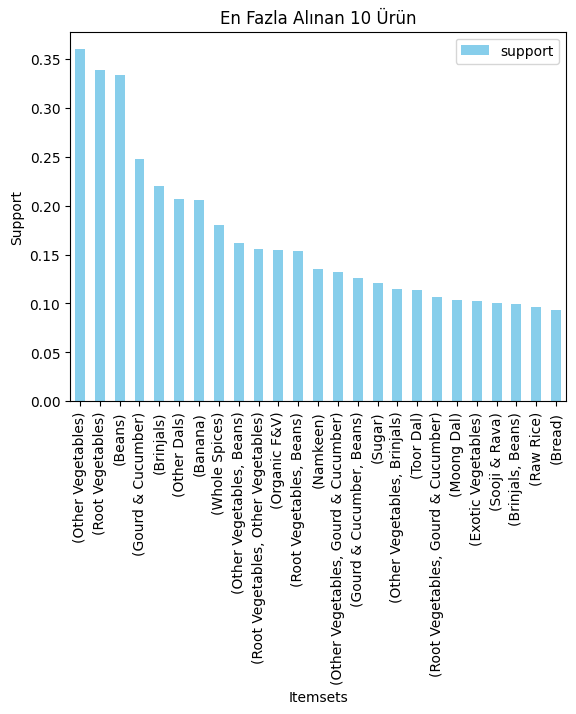

In [155]:
# En sık geçen 10 ürün kümesini görselleştirme
frequent_itemsets.sort_values(by='support', ascending=False).head(25).plot(kind='bar', x='itemsets', y='support', color='skyblue')
plt.title('En Fazla Alınan 10 Ürün')
plt.ylabel('Support')
plt.xlabel('Itemsets')
plt.xticks(rotation=90)
plt.show()


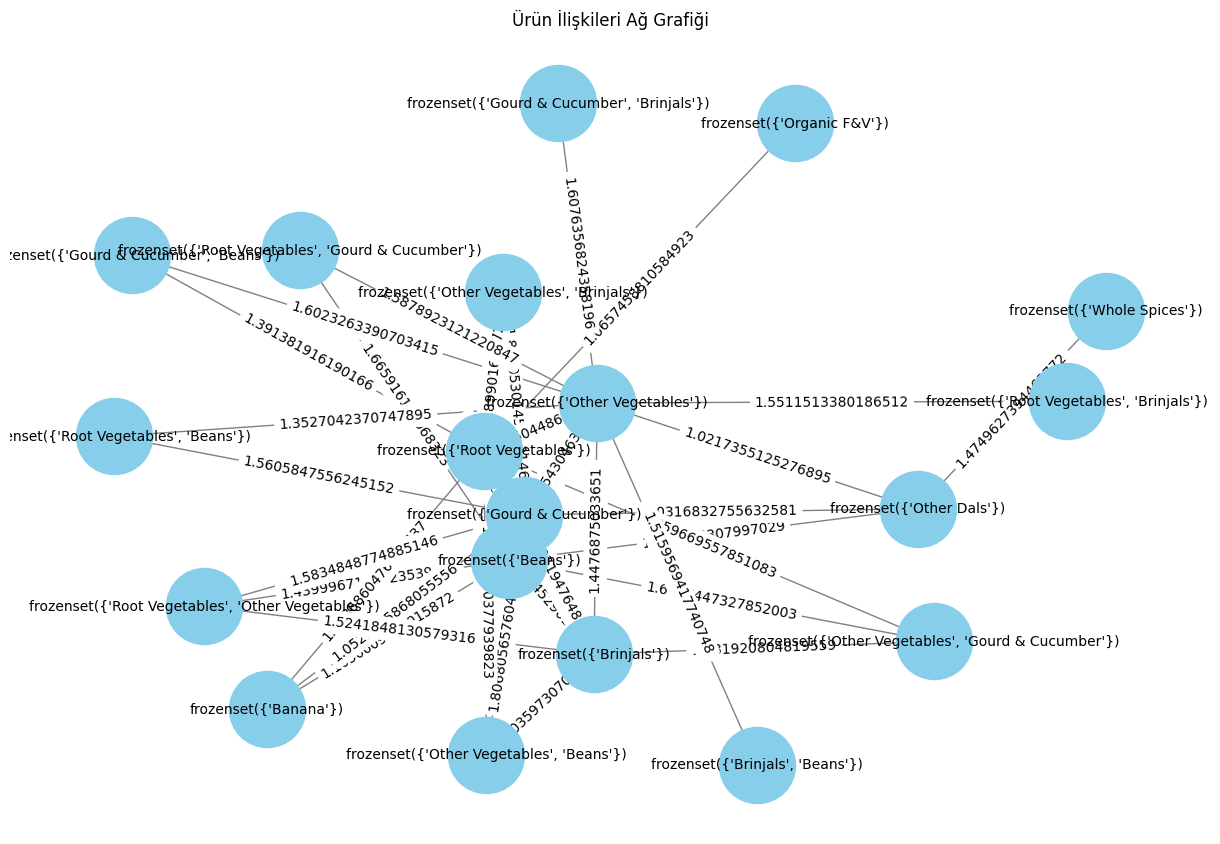

In [158]:
# İlişki ağını kurmak için NetworkX kullanıyoruz
G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents', ['support', 'confidence', 'lift'])

# Ağı çizmek için Matplotlib kullanıyoruz
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=1.5)  # Düğüm pozisyonları
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')

# Her kenarın (ilişkinin) üzerine lift değerlerini ekleyelim
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Ürün İlişkileri Ağ Grafiği')
plt.show()

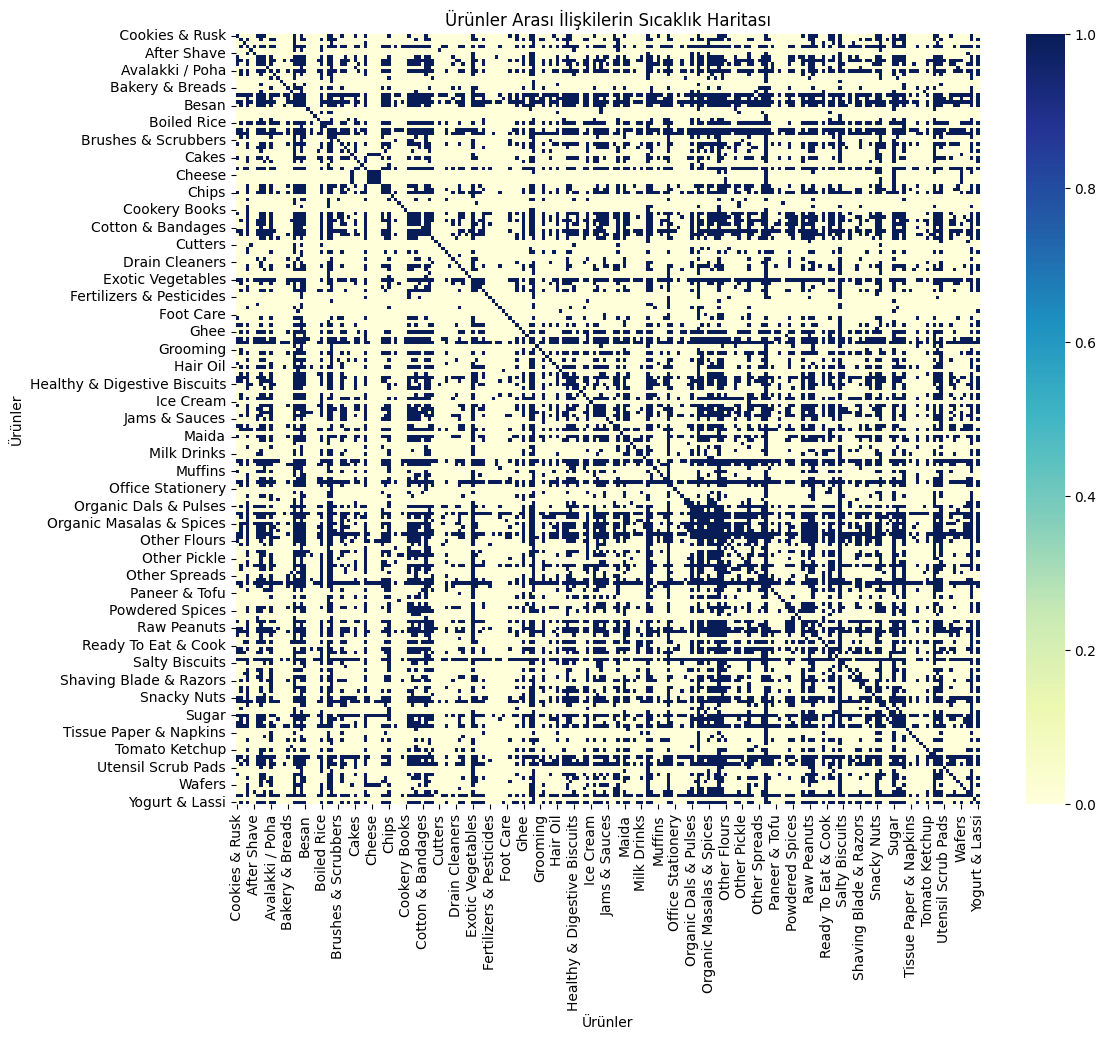

In [159]:
# Ürünler arası ilişki matrisini oluştur
co_occurrence_matrix = df.T.dot(df)

# Sıcaklık haritasını oluşturma
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, cmap='YlGnBu', annot=False, fmt='d')
plt.title('Ürünler Arası İlişkilerin Sıcaklık Haritası')
plt.xlabel('Ürünler')
plt.ylabel('Ürünler')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

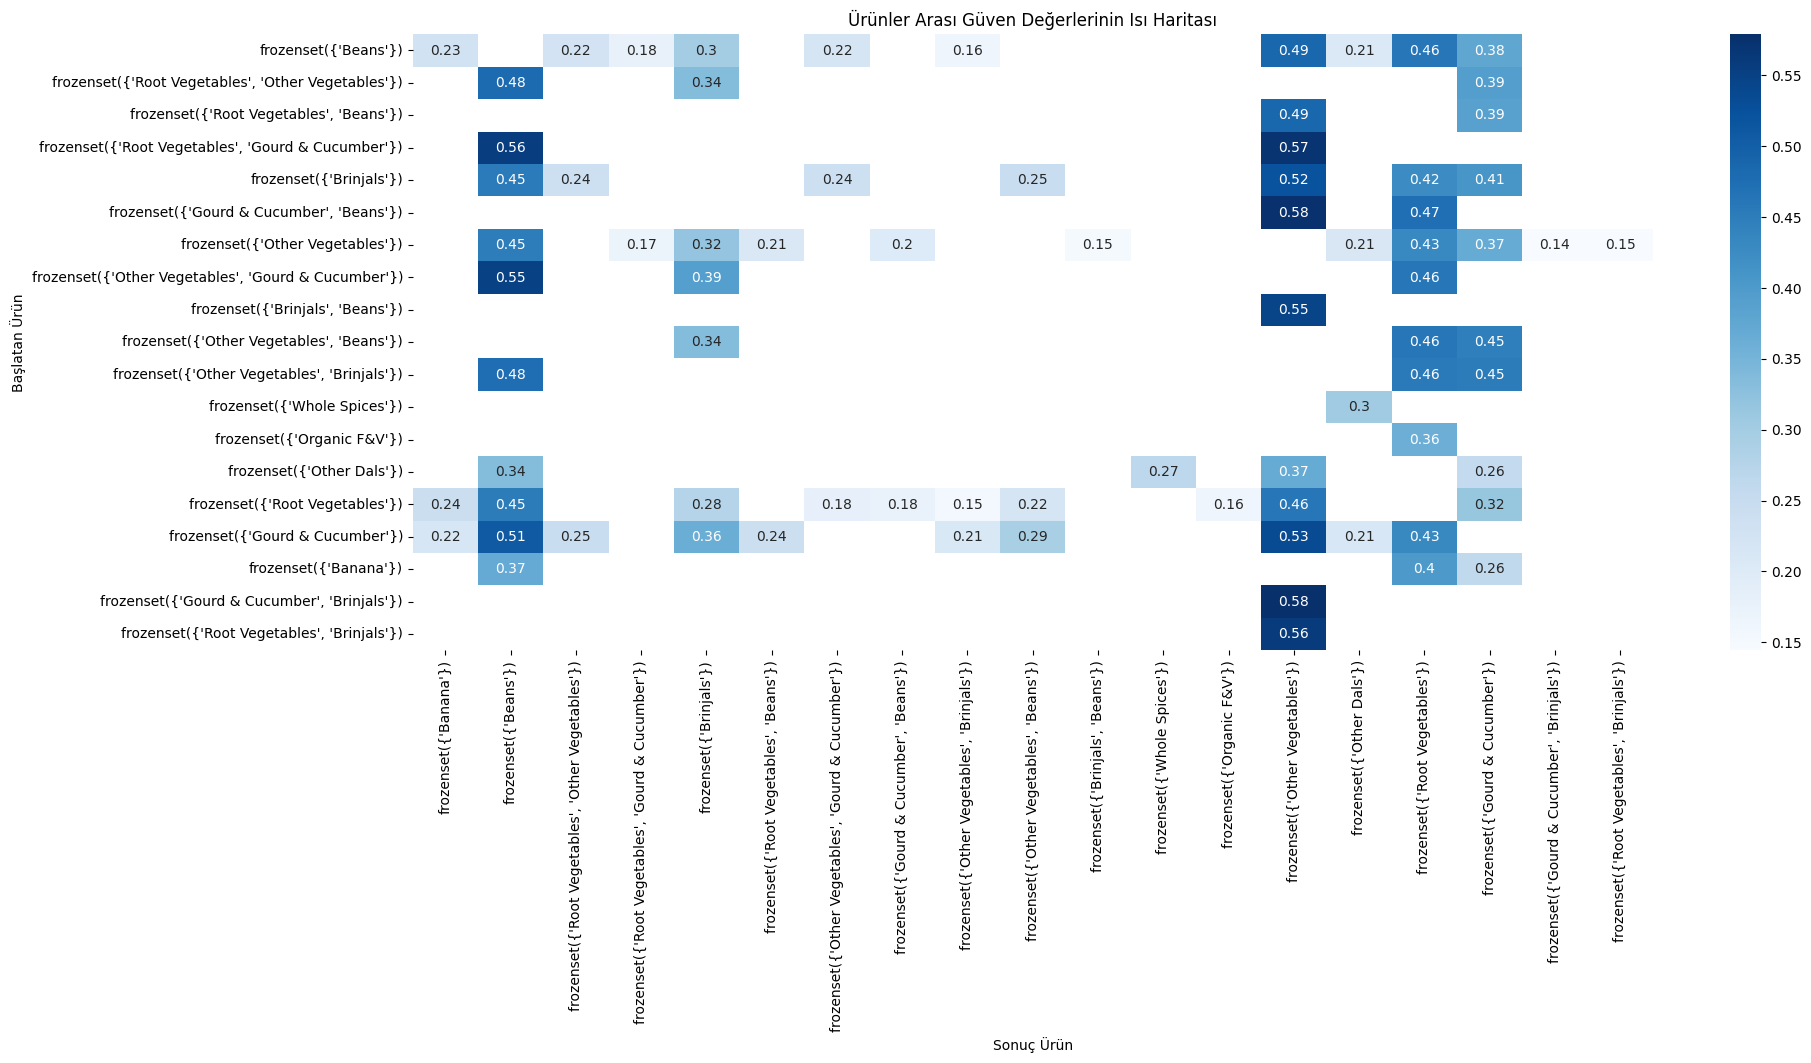

In [160]:
# Güven değerlerini içeren matris
confidence_matrix = rules.pivot(index='antecedents', columns='consequents', values='confidence')
# Isı haritası
plt.figure(figsize=(20, 8))
sns.heatmap(confidence_matrix, cmap='Blues', annot=True)
plt.title('Ürünler Arası Güven Değerlerinin Isı Haritası')
plt.xlabel('Sonuç Ürün')
plt.ylabel('Başlatan Ürün')
plt.xticks(rotation=90)
plt.show()

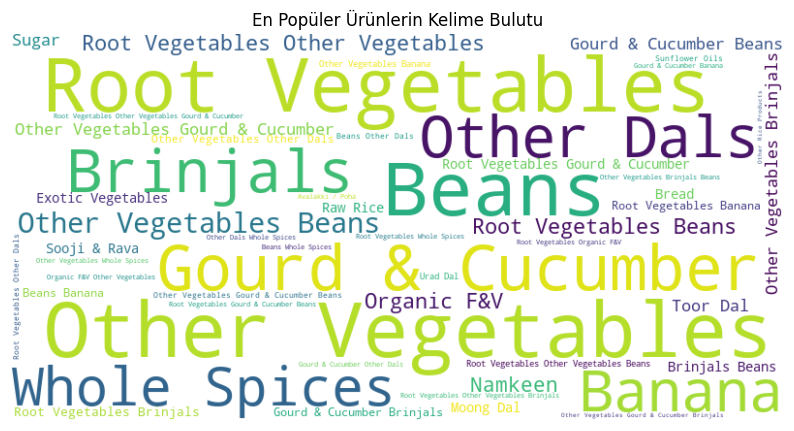

In [162]:
frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: ' '.join(list(x)))
support_dict = dict(zip(frequent_itemsets['itemsets_str'], frequent_itemsets['support']))

# Wordcloud oluşturma
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(support_dict)

# Wordcloud görselleştirme
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('En Popüler Ürünlerin Kelime Bulutu')
plt.show()

In [163]:
def öneri_yap(rules, satın_alınan_ürün):
    # Kurallarda satın alınan ürünü içeren antecedent'leri (öncüller) bul
    önerilen_kurallar = rules[rules['antecedents'].apply(lambda x: satın_alınan_ürün in x)]
    
    # Bu kuralları lift değerine göre sıralayarak en anlamlı olanları öner
    önerilen_kurallar = önerilen_kurallar.sort_values(by='lift', ascending=False)

    # Kullanıcıya önerilecek ürünleri listele
    önerilen_ürünler = []
    for _, row in önerilen_kurallar.iterrows():
        önerilen_ürünler.extend(list(row['consequents']))
    
    # Önerilen ürünleri tekrarları önlemek için set'e çevirip liste yap
    önerilen_ürünler = list(set(önerilen_ürünler))
    
    return önerilen_ürünler


In [165]:
satın_alınan_ürün = 'Beans'
öneriler = öneri_yap(rules, satın_alınan_ürün)

print(f"Kullanıcıya '{satın_alınan_ürün}' ürünü ile birlikte şu ürünleri önerin: {öneriler}")


Kullanıcıya 'Beans' ürünü ile birlikte şu ürünleri önerin: ['Brinjals', 'Other Dals', 'Banana', 'Other Vegetables', 'Gourd & Cucumber', 'Root Vegetables']
